In [5]:
import numpy as np
from load_mnist import load_mnist
import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset



In [ ]:
# Load MNIST dataset
X_train, Y_train, X_test, Y_test = load_mnist()

In [ ]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cpu device


In [ ]:
X_train = torch.from_numpy(X_train).float().to(device)
Y_train = torch.from_numpy(Y_train).float().to(device)
X_test = torch.from_numpy(X_test).float().to(device)
Y_test = torch.from_numpy(Y_test).float().to(device)

In [ ]:
if X_train.shape[-1] != 784:
    X_train = X_train.reshape(-1, 784)
    X_test = X_test.reshape(-1, 784)

print(f"X_train shape: {X_train.shape}")

X_train shape: torch.Size([60000, 784])


In [ ]:

batch_size = 200
train_data = TensorDataset(X_train,Y_train)
test_data = TensorDataset(X_test,Y_test)
loaders = {
    'train' : DataLoader(train_data, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        num_workers=0),

    'test'  : DataLoader(test_data, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        num_workers=0),
}
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fe4d522ce20>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7fe4d522c100>}

In [ ]:
#######1.1
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:512'

n_epochs = 10
batch_size = 200
learning_rate = 0.1
n_input = 28*28
n_hidden_layer = [128, 50]
n_output = 10

# define the model
model = nn.Sequential(
    nn.Linear(n_input, n_hidden_layer[0]),
    nn.ReLU(),
    nn.Linear(n_hidden_layer[0], n_hidden_layer[1]),
    nn.ReLU(),
    nn.Linear(n_hidden_layer[-1], n_output),
).to(device)
print(model)

loss_fn   = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

def acc_fn(y_pred, y_true):
    return (y_pred.argmax(1) == y_true.argmax(1)).float().mean().item()

losses_train, losses_test, acc_train, acc_test = [], [], [], []

for epoch in range(n_epochs):
    model.train()
    #for idx in yield_minibatches_idx(batch_size, X_train):
    for idx, (X, Y) in enumerate(loaders['train']):
        y_pred = model(X)
        loss = loss_fn(y_pred, Y)
        #losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        y_pred_train = model(X_train)
        y_pred_test = model(X_test)
    losses_train.append(loss_fn(y_pred_train, Y_train).item())
    losses_test.append(loss_fn(y_pred_test, Y_test).item())
    acc_train.append(acc_fn(y_pred_train, Y_train))
    acc_test.append(acc_fn(y_pred_test, Y_test))

    print(f'Finished epoch {epoch}, train loss {losses_train[-1]:.4f}, test loss {losses_test[-1]:.4f}, \
           train acc {acc_train[-1]:.4f}, test acc {acc_test[-1]:.4f}')

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=10, bias=True)
)
Finished epoch 0, train loss 0.1336, test loss 0.1422,            train acc 0.9590, test acc 0.9552
Finished epoch 1, train loss 0.0939, test loss 0.1154,            train acc 0.9708, test acc 0.9656
Finished epoch 2, train loss 0.0585, test loss 0.0923,            train acc 0.9821, test acc 0.9707
Finished epoch 3, train loss 0.0452, test loss 0.0882,            train acc 0.9853, test acc 0.9714
Finished epoch 4, train loss 0.0354, test loss 0.0797,            train acc 0.9892, test acc 0.9763
Finished epoch 5, train loss 0.0362, test loss 0.0880,            train acc 0.9883, test acc 0.9751
Finished epoch 6, train loss 0.0315, test loss 0.0863,            train acc 0.9897, test acc 0.9758
Finished epoch 7, train loss 0.0310, test loss 0.0972,            train acc 0.989

In [ ]:
####1.2
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'max_split_size_mb:512'
torch.cuda.empty_cache()

n_epochs = 100
batch_size = 200
learning_rate = 0.1
n_input = 28*28
n_output = 10

X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)
batch_size = 200
train_data = TensorDataset(X_train,Y_train)
test_data = TensorDataset(X_test,Y_test)
loaders = {
    'train' : DataLoader(train_data, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        num_workers=0),

    'test'  : DataLoader(test_data, 
                        batch_size=batch_size, 
                        shuffle=True, 
                        num_workers=0),
}

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels=1,              
                out_channels=8,            
                kernel_size=3,              
                stride=1,                   
                padding=1,                  
            ),                              
            nn.ReLU(),                      
            nn.MaxPool2d(kernel_size=2, stride=2),    
        )
        self.conv2 = nn.Sequential(         
            nn.Conv2d(8, 16, 3, 1, 1),     
            nn.ReLU(),                      
            nn.MaxPool2d(2),                
        )
        self.conv3 = nn.Sequential(         
            nn.Conv2d(16, 32, 3, 1, 1),     
            nn.ReLU(),                      
            #nn.MaxPool2d(2),                
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output   # return x for visualization

model = CNN().to(device)
# train the model
loss_fn   = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

def acc_fn(y_pred, y_true):
    return (y_pred.argmax(1) == y_true.argmax(1)).float().mean().item()

losses_train, losses_test, acc_train, acc_test = [], [], [], []
for epoch in range(n_epochs):
    model.train()
    for idx, (X, Y) in enumerate(loaders['train']):
        y_pred = model(X)
        loss = loss_fn(y_pred, Y)
        #losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    with torch.no_grad():
        y_pred_train = model(X_train)
        y_pred_test = model(X_test)
    losses_train.append(loss_fn(y_pred_train, Y_train).item())
    losses_test.append(loss_fn(y_pred_test, Y_test).item())
    acc_train.append(acc_fn(y_pred_train, Y_train))
    acc_test.append(acc_fn(y_pred_test, Y_test))

    print(f'Finished epoch {epoch}, train loss {losses_train[-1]:.4f}, test loss {losses_test[-1]:.4f}, \
           train acc {acc_train[-1]:.4f}, test acc {acc_test[-1]:.4f}')


Finished epoch 0, train loss 0.0889, test loss 0.0778,            train acc 0.9718, test acc 0.9756
Finished epoch 1, train loss 0.0595, test loss 0.0666,            train acc 0.9816, test acc 0.9784
Finished epoch 2, train loss 0.0398, test loss 0.0457,            train acc 0.9871, test acc 0.9850
Finished epoch 3, train loss 0.0320, test loss 0.0441,            train acc 0.9897, test acc 0.9854
Finished epoch 4, train loss 0.0289, test loss 0.0363,            train acc 0.9903, test acc 0.9879
Finished epoch 5, train loss 0.0210, test loss 0.0367,            train acc 0.9932, test acc 0.9882
Finished epoch 6, train loss 0.0244, test loss 0.0465,            train acc 0.9921, test acc 0.9867
Finished epoch 7, train loss 0.0164, test loss 0.0342,            train acc 0.9946, test acc 0.9902
Finished epoch 8, train loss 0.0158, test loss 0.0353,            train acc 0.9951, test acc 0.9893
Finished epoch 9, train loss 0.0133, test loss 0.0371,            train acc 0.9958, test acc 0.9884


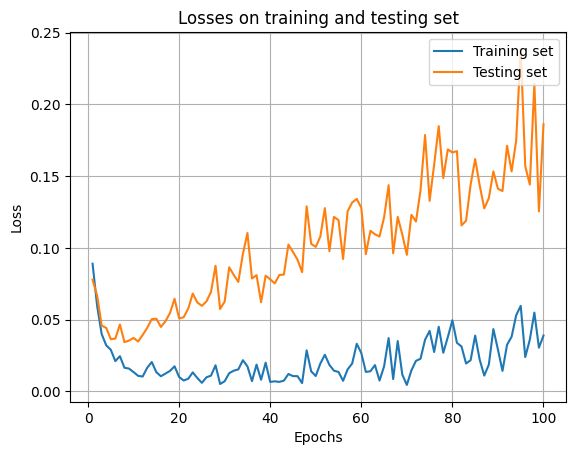

In [ ]:
fig = plt.figure()
plt.plot(range(1, len(losses_train) + 1), losses_train, label='Training set')

plt.plot(range(1, len(losses_test) + 1), losses_test, label='Testing set')
plt.title('Losses on training and testing set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid()
plt.show()
fig.savefig('losses_cnn.png')

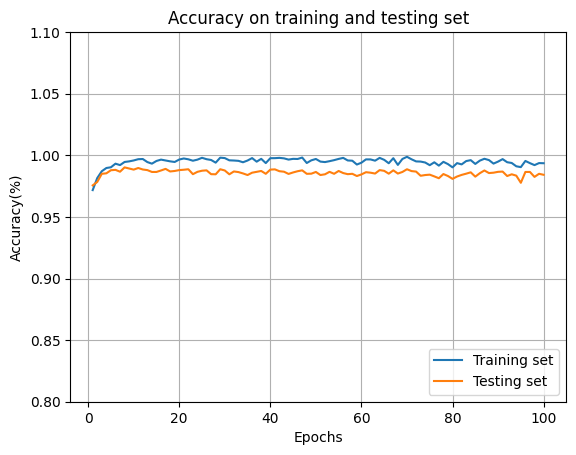

In [ ]:
fig = plt.figure()
plt.plot(range(1, len(acc_train) + 1), acc_train, label='Training set')
plt.plot(range(1, len(acc_test) + 1), acc_test, label='Testing set')
plt.title('Accuracy on training and testing set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy(%)')
plt.ylim(0.8, 1.1)
plt.legend(loc='lower right')
plt.grid()
plt.show()
fig.savefig('accuracy_cnn.png')